## Contributor statistics

This notebook displays statistics about the contributors in the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.

In [1]:
import pandas as pd
import sys, os

sys.path.insert(1, os.pardir)
import utils
import utils_stats
import utils_plot

In [2]:
contributorMeasurementFiles = [
    '2022-05-03_person-contributor-stats.csv', '2022-05-23_person-contributor-stats.csv',
    '2022-06-16_person-contributor-stats.csv', '2022-05-09_person-contributor-stats.csv',
    '2022-06-07_person-contributor-stats.csv', '2022-06-20_person-contributor-stats.csv',
    '2022-06-23_person-contributor-stats.csv', '2022-06-24_person-contributor-stats.csv',
    '2022-07-18_person-contributor-stats.csv', '2022-07-20_person-contributor-stats.csv',
    '2022-07-21_person-contributor-stats.csv', '2022-07-25_person-contributor-stats.csv',
    '2022-07-26_person-contributor-stats.csv', '2022-07-27_person-contributor-stats.csv',
    '2022-08-08_person-contributor-stats.csv', '2022-08-11_person-contributor-stats.csv',
    '2022-08-18_person-contributor-stats.csv', '2022-09-05_person-contributor-stats.csv',
    '2022-09-07_person-contributor-stats.csv', '2022-09-08_person-contributor-stats.csv',
    '2022-09-12_person-contributor-stats.csv', '2022-09-27_person-contributor-stats.csv',
    '2022-11-30_person-contributor-stats.csv', '2022-09-12_person-contributor-stats.csv',
    '2022-12-15_person-contributor-stats.csv', '2022-12-21_person-contributor-stats.csv',
    '2022-12-23_person-contributor-stats.csv', '2023-01-20_person-contributor-stats.csv',
    '2023-02-01_person-contributor-stats.csv'
]

In [3]:
contributorStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', contributorMeasurementFiles)

The following two plots show the proportion and integration of person contributor identifiers from our three main data sources in the corpus: KBR, BnF and KB. Most contributors have a KBR identifier.

Initially, the proportion of identifiers of these 3 sources was very low, because the contributor list also showed Belgians from the ISNI data dump which were actually not contributing to the corpus books. From the version of `2022-05-23` only actual contributors were counted, thus the proportions reflect the actual contributors.

### Identifiers overview

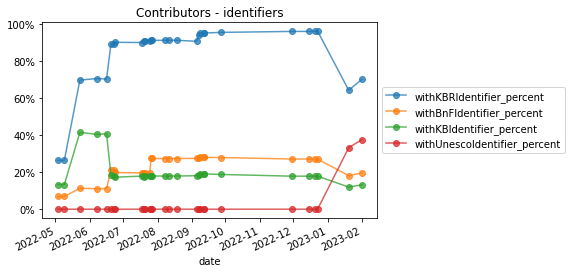

In [4]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 
                                   'withKBIdentifier', 'withUnescoIdentifier'],
                                  'Contributors - identifiers',
                                 'numberContributors')

In [5]:
contributorStats[['numberContributors', 'withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier', 'withUnescoIdentifier']].sort_index()

,numberContributors,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier
date,,,,,
2022-05-03,48835,12850,3357,6499,0
2022-05-09,48835,12850,3357,6499,0
2022-05-23,15681,10923,1764,6499,0
2022-06-07,16100,11342,1780,6499,0
2022-06-16,15991,11233,1779,6499,0
2022-06-20,5843,5214,1231,1063,0
2022-06-23,5901,5272,1232,1067,0
2022-06-24,6243,5621,1237,1079,0
2022-07-18,6352,5711,1241,1134,0


For the corpus of `2022-05-23` we only started to count contributors with at least a KBR, BnF or KB identifier. We did this, because otherwise we have plenty of persons from the ISNI Belgian dump who did not even contribute anything to the BELTRANS corpus. **The total number of contributors decreased** and hence the **proportion of KBR, BnF and KB authorities increased** due to a different total. 

For the corpus of `2022-06-20` we started to filter out persons with 0 authored, translated, illustrated, scened or directed books. Hence the total number of contributors as well as the number of persons with KBR, BnF and KB identifier decreased. However, the proportions changed: the **fraction of KBR and BnF persons increased whereas the fraction of KB persons decreased**.

In [6]:
from IPython.display import display, Markdown
display(Markdown(contributorStats['comment'].sort_index().to_markdown()))

| date                | comment                                                                                                                                                                   |
|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 00:00:00 | Contributors integrated from ISNI SRU dump, KBR, BnF and NTA based on ISNI, VIAF and Wikidata identifiers.                                                                |
| 2022-05-09 00:00:00 | Contributors integrated from ISNI SRU dump, KBR, BnF and NTA based on ISNI, VIAF and Wikidata identifiers.                                                                |
| 2022-05-23 00:00:00 | Only count persons who are actually contributing to manifestations of the corpus (author, translator, illustrator, scenarist, publishing director)                        |
| 2022-06-07 00:00:00 | Added columns with statistics about how many books a contributor authored, translated etc.                                                                                |
| 2022-06-16 00:00:00 | Added columns with statistics about how many books a contributor authored, translated etc.                                                                                |
| 2022-06-20 00:00:00 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL.                                                                                        |
| 2022-06-23 00:00:00 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 00:00:00 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 00:00:00 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |
| 2022-07-20 00:00:00 | Fixed error in ISNI-SRU integration SPARQL query.                                                                                                                         |
| 2022-07-21 00:00:00 | Manually curated Wikidata overlap used as bridge identifeir with adapted integration SPARQL queries.                                                                      |
| 2022-07-25 00:00:00 | Integrated using also ISNI identifiers retrieved from Wikidata via QID                                                                                                    |
| 2022-07-26 00:00:00 | Added roughly 5,000 more contributors from BnF, providing additional nationality information                                                                              |
| 2022-07-27 00:00:00 | Added missing nationalities from Wikidata                                                                                                                                 |
| 2022-08-08 00:00:00 | Added source links KBR identified via exact title match or 0.9 similarity                                                                                                 |
| 2022-08-11 00:00:00 | New export from the KBR catalogue                                                                                                                                         |
| 2022-08-18 00:00:00 | Strictly split translations and originals into different named graphs                                                                                                     |
| 2022-09-05 00:00:00 | Integration changes: dynamic SPARQL instead of files                                                                                                                      |
| 2022-09-07 00:00:00 | Added a KBR export of Belgian person authorities                                                                                                                          |
| 2022-09-08 00:00:00 | fetched more KBR ISNIs because of fixed parsing and fixed Wikidata contributor update via ISNI                                                                            |
| 2022-09-12 00:00:00 | New export from KBR                                                                                                                                                       |
| 2022-09-12 00:00:00 | New export from KBR                                                                                                                                                       |
| 2022-09-27 00:00:00 | Fixed contributor overlapping to reduce duplicates                                                                                                                        |
| 2022-11-30 00:00:00 | New export from KBR and removed Wikidata correlation list as source                                                                                                       |
| 2022-12-15 00:00:00 | added available BnF source titles                                                                                                                                         |
| 2022-12-21 00:00:00 | updated ISNI contributor data, now also with KBR identifiers                                                                                                              |
| 2022-12-23 00:00:00 | fixed matching between ISNI-SRU and NTA by using a p prefix for NTA identifiers in ISNI                                                                                   |
| 2023-01-20 00:00:00 | Added new data source: Unesco Index Translationum                                                                                                                         |
| 2023-02-01 00:00:00 | Added corrections via a contributor correlation list                                                                                                                      |

In [7]:
overlapColumns = ['withKBRBnFKBAndUnescoIdentifier', 'withKBRAndBnFIdentifier', 'withKBRAndKBIdentifier', 
                  'withKBRAndUnescoIdentifier', 'withBnFAndKBIdentifier', 'withBnFAndUnescoIdentifier', 
                  'withKBAndUnescoIdentifier']

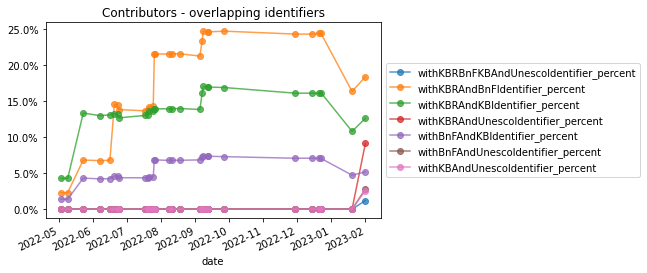

In [8]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 overlapColumns,
                                  'Contributors - overlapping identifiers',
                                 'numberContributors')

In [9]:
contributorStats[['numberContributors'] + overlapColumns]

,numberContributors,withKBRBnFKBAndUnescoIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withKBRAndUnescoIdentifier,withBnFAndKBIdentifier,withBnFAndUnescoIdentifier,withKBAndUnescoIdentifier
date,,,,,,,,
2022-05-03,48835,0,1127,2094,0,678,0,0
2022-05-23,15681,0,1071,2094,0,678,0,0
2022-06-16,15991,0,1086,2094,0,678,0,0
2022-05-09,48835,0,1127,2094,0,678,0,0
2022-06-07,16100,0,1087,2094,0,678,0,0
2022-06-20,5843,0,853,774,0,270,0,0
2022-06-23,5901,0,854,778,0,271,0,0
2022-06-24,6243,0,864,792,0,273,0,0
2022-07-18,6352,0,868,828,0,277,0,0


In the above figure we can see that KBR person authorities have an almost equally overlap with BnF and with KB. Whereas the overlap between all three and the overlap between BnF and KB is smaller. 

This makes sense, considering only BnF and KB, because the translation flow **NL-FR contains more BnF data** and the flow **FR-NL contains more KB data** (see manifestation stats in the previous section). Contributors of FR-NL and NL-FR are different (less overlap), but KBR contains most translation flows in both directions, hence it has a bigger overlap with FR-NL (KB) and NL-FR (BnF).

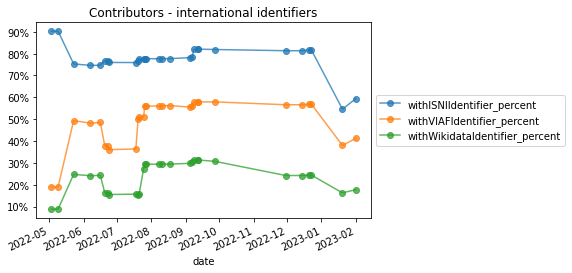

In [10]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withISNIIdentifier', 'withVIAFIdentifier', 'withWikidataIdentifier'],
                                  'Contributors - international identifiers',
                                 'numberContributors')

In [11]:
contributorStats[['numberContributors', 'withISNIIdentifier', 'withVIAFIdentifier', 'withWikidataIdentifier']]

,numberContributors,withISNIIdentifier,withVIAFIdentifier,withWikidataIdentifier
date,,,,
2022-05-03,48835,44084,9249,4292
2022-05-23,15681,11803,7734,3879
2022-06-16,15991,11938,7751,3881
2022-05-09,48835,44084,9249,4292
2022-06-07,16100,12013,7757,3881
2022-06-20,5843,4486,2216,956
2022-06-23,5901,4527,2223,959
2022-06-24,6243,4742,2250,968
2022-07-18,6352,4821,2309,996


### KBR insights

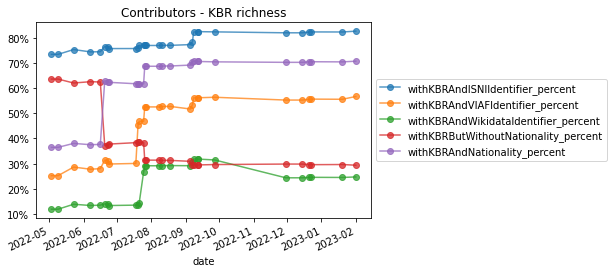

In [12]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withKBRAndISNIIdentifier', 'withKBRAndVIAFIdentifier', 
                                  'withKBRAndWikidataIdentifier', 'withKBRButWithoutNationality',
                                  'withKBRAndNationality'],
                                  'Contributors - KBR richness',
                                 'withKBRIdentifier')

In [13]:
contributorStats[['numberContributors', 'withKBRAndISNIIdentifier', 'withKBRAndVIAFIdentifier', 
                  'withKBRAndWikidataIdentifier', 'withKBRAndNationality', 'withKBRButWithoutNationality']]

,numberContributors,withKBRAndISNIIdentifier,withKBRAndVIAFIdentifier,withKBRAndWikidataIdentifier,withKBRAndNationality,withKBRButWithoutNationality
date,,,,,,
2022-05-03,48835,9426,3240,1530,4684,8166
2022-05-23,15681,8221,3127,1515,4153,6770
2022-06-16,15991,8356,3144,1517,4225,7008
2022-05-09,48835,9426,3240,1530,4684,8166
2022-06-07,16100,8431,3150,1517,4253,7089
2022-06-20,5843,3987,1636,730,3278,1936
2022-06-23,5901,4028,1643,733,3299,1973
2022-06-24,6243,4252,1677,751,3499,2122
2022-07-18,6352,4321,1717,772,3523,2188


### BnF insights

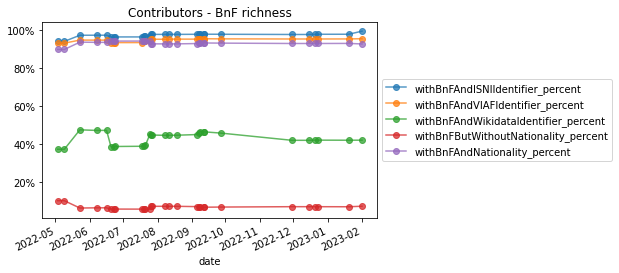

In [14]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withBnFAndISNIIdentifier', 'withBnFAndVIAFIdentifier', 
                                  'withBnFAndWikidataIdentifier', 'withBnFButWithoutNationality',
                                  'withBnFAndNationality'],
                                  'Contributors - BnF richness',
                                 'withBnFIdentifier')

In [15]:
contributorStats[['numberContributors', 'withBnFAndISNIIdentifier', 'withBnFAndVIAFIdentifier', 
                  'withBnFAndWikidataIdentifier', 'withBnFAndNationality', 'withBnFButWithoutNationality']]

,numberContributors,withBnFAndISNIIdentifier,withBnFAndVIAFIdentifier,withBnFAndWikidataIdentifier,withBnFAndNationality,withBnFButWithoutNationality
date,,,,,,
2022-05-03,48835,3159,3128,1251,3016,341
2022-05-23,15681,1717,1672,838,1653,111
2022-06-16,15991,1732,1686,840,1665,114
2022-05-09,48835,3159,3128,1251,3016,341
2022-06-07,16100,1733,1687,840,1666,114
2022-06-20,5843,1187,1150,475,1160,71
2022-06-23,5901,1188,1151,476,1161,71
2022-06-24,6243,1193,1156,479,1166,71
2022-07-18,6352,1197,1160,482,1170,71


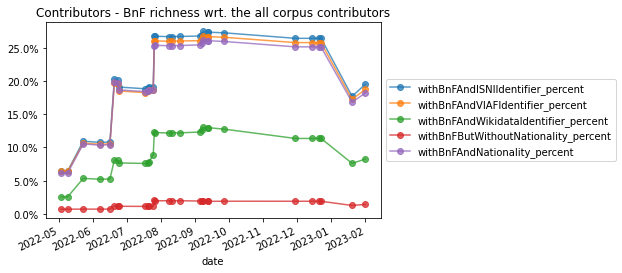

In [16]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withBnFAndISNIIdentifier', 'withBnFAndVIAFIdentifier', 
                                  'withBnFAndWikidataIdentifier', 'withBnFButWithoutNationality',
                                 'withBnFAndNationality'],
                                  'Contributors - BnF richness wrt. the all corpus contributors',
                                 'numberContributors')

### KB insights

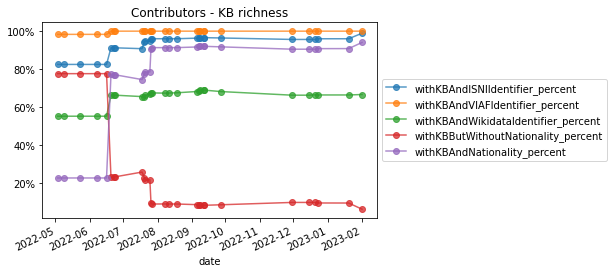

In [17]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withKBAndISNIIdentifier', 'withKBAndVIAFIdentifier', 
                                  'withKBAndWikidataIdentifier', 'withKBButWithoutNationality',
                                 'withKBAndNationality'],
                                  'Contributors - KB richness',
                                 'withKBIdentifier')

In [18]:
contributorStats[['numberContributors', 'withKBAndISNIIdentifier', 'withKBAndVIAFIdentifier', 
                  'withKBAndWikidataIdentifier', 'withKBButWithoutNationality']]

,numberContributors,withKBAndISNIIdentifier,withKBAndVIAFIdentifier,withKBAndWikidataIdentifier,withKBButWithoutNationality
date,,,,,
2022-05-03,48835,5357,6389,3579,5040
2022-05-23,15681,5357,6389,3579,5040
2022-06-16,15991,5357,6389,3579,5040
2022-05-09,48835,5357,6389,3579,5040
2022-06-07,16100,5357,6389,3579,5040
2022-06-20,5843,970,1063,703,242
2022-06-23,5901,974,1067,706,245
2022-06-24,6243,984,1079,714,249
2022-07-18,6352,1029,1134,742,290


### Unesco insights

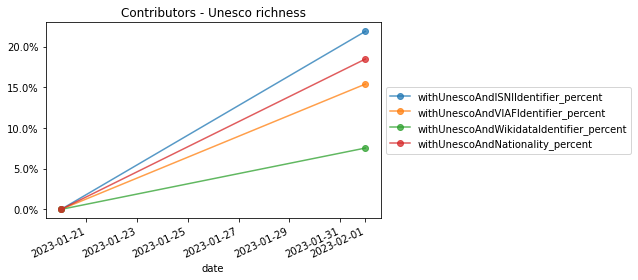

In [19]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withUnescoAndISNIIdentifier', 'withUnescoAndVIAFIdentifier', 
                                  'withUnescoAndWikidataIdentifier', 'withUnescoAndNationality'],
                                  'Contributors - Unesco richness',
                                 'withUnescoIdentifier')

In [20]:
contributorStats[['numberContributors', 'withUnescoIdentifier', 'withUnescoAndISNIIdentifier', 'withUnescoAndVIAFIdentifier', 
                  'withUnescoAndWikidataIdentifier', 'withUnescoAndNationality']]

,numberContributors,withUnescoIdentifier,withUnescoAndISNIIdentifier,withUnescoAndVIAFIdentifier,withUnescoAndWikidataIdentifier,withUnescoAndNationality
date,,,,,,
2022-05-03,48835,0,0,0,0,0
2022-05-23,15681,0,0,0,0,0
2022-06-16,15991,0,0,0,0,0
2022-05-09,48835,0,0,0,0,0
2022-06-07,16100,0,0,0,0,0
2022-06-20,5843,0,0,0,0,0
2022-06-23,5901,0,0,0,0,0
2022-06-24,6243,0,0,0,0,0
2022-07-18,6352,0,0,0,0,0


### Duplicate identifiers
For example an authority with 2 KBR identifiers or an authority with 2 ISNI identifiers.

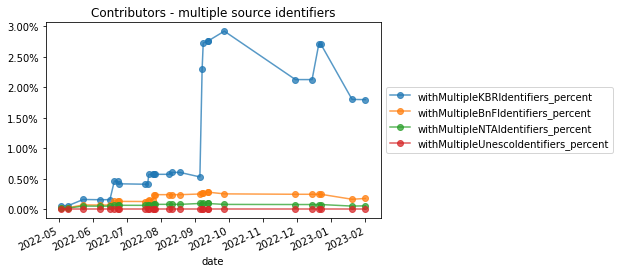

In [21]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  list(map(lambda val: f'withMultiple{val}Identifiers', ['KBR', 'BnF', 'NTA', 'Unesco'])),
                                  'Contributors - multiple source identifiers',
                                 'numberContributors')

In [22]:
contributorStats[['numberContributors', 'withMultipleKBRIdentifiers', 'withMultipleBnFIdentifiers', 'withMultipleNTAIdentifiers', 'withMultipleUnescoIdentifiers']].sort_index()

,numberContributors,withMultipleKBRIdentifiers,withMultipleBnFIdentifiers,withMultipleNTAIdentifiers,withMultipleUnescoIdentifiers
date,,,,,
2022-05-03,48835,27,11,8,0
2022-05-09,48835,27,11,8,0
2022-05-23,15681,25,11,8,0
2022-06-07,16100,25,11,8,0
2022-06-16,15991,25,11,8,0
2022-06-20,5843,27,8,4,0
2022-06-23,5901,27,8,4,0
2022-06-24,6243,26,8,4,0
2022-07-18,6352,26,8,4,0


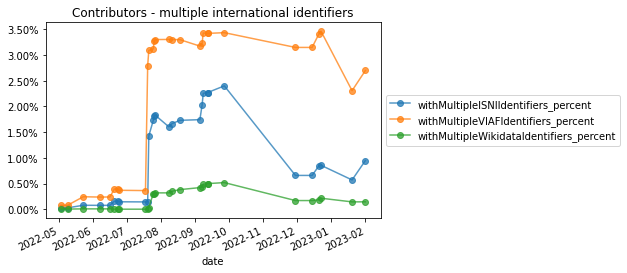

In [23]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  list(map(lambda val: f'withMultiple{val}Identifiers', ['ISNI', 'VIAF', 'Wikidata'])),
                                  'Contributors - multiple international identifiers',
                                 'numberContributors')

In [24]:
contributorStats[['numberContributors', 'withMultipleISNIIdentifiers', 'withMultipleVIAFIdentifiers', 'withMultipleWikidataIdentifiers']].sort_index()

,numberContributors,withMultipleISNIIdentifiers,withMultipleVIAFIdentifiers,withMultipleWikidataIdentifiers
date,,,,
2022-05-03,48835,13,38,1
2022-05-09,48835,13,38,1
2022-05-23,15681,12,38,1
2022-06-07,16100,12,38,1
2022-06-16,15991,12,38,1
2022-06-20,5843,9,23,0
2022-06-23,5901,9,23,0
2022-06-24,6243,9,23,0
2022-07-18,6352,9,23,0


### Identifiers and nationality information

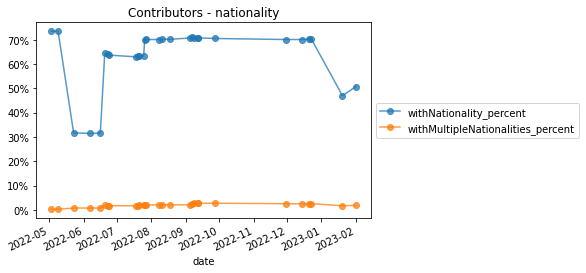

In [25]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withNationality', 'withMultipleNationalities'],
                                  'Contributors - nationality',
                                 'numberContributors')

In [26]:
contributorStats[['numberContributors', 'withNationality', 'withMultipleNationalities']].sort_index()

,numberContributors,withNationality,withMultipleNationalities
date,,,
2022-05-03,48835,35872,134
2022-05-09,48835,35872,134
2022-05-23,15681,4961,119
2022-06-07,16100,5061,120
2022-06-16,15991,5033,120
2022-06-20,5843,3759,105
2022-06-23,5901,3780,105
2022-06-24,6243,3971,106
2022-07-18,6352,3996,107


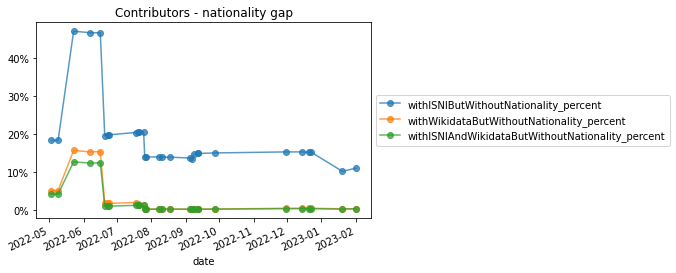

In [27]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withISNIButWithoutNationality', 'withWikidataButWithoutNationality',
                                  'withISNIAndWikidataButWithoutNationality'],
                                  'Contributors - nationality gap',
                                 'numberContributors')

In [28]:
contributorStats[['numberContributors', 'withISNIButWithoutNationality', 'withWikidataButWithoutNationality',
                  'withISNIAndWikidataButWithoutNationality']]

,numberContributors,withISNIButWithoutNationality,withWikidataButWithoutNationality,withISNIAndWikidataButWithoutNationality
date,,,,
2022-05-03,48835,8950,2502,2027
2022-05-23,15681,7387,2460,1987
2022-06-16,15991,7464,2460,1987
2022-05-09,48835,8950,2502,2027
2022-06-07,16100,7516,2460,1987
2022-06-20,5843,1146,104,59
2022-06-23,5901,1169,106,61
2022-06-24,6243,1237,108,63
2022-07-18,6352,1296,124,77


Since `2022-06-20`, these numbers are computed based on the persons who are already contributors in the BELTRANS corpus, where we have roughly 20% of persons with ISNI but without nationality. Hence, filling their nationality gap will not necessarily increase the number of books in the corpus, through some collaboration with a known Belgian these contributors are already in the corpus. However, it could be, that there are translations of these persons in the integrated data, without known Belgian collaborations, which we could identify after enriching their nationality.

Between `2022-05-23` and `2022-06-16` there are more than 40% of persons with ISNI but without nationality. These additional 20% may contain Belgians whose works are currently filtered out due to missing nationality information.

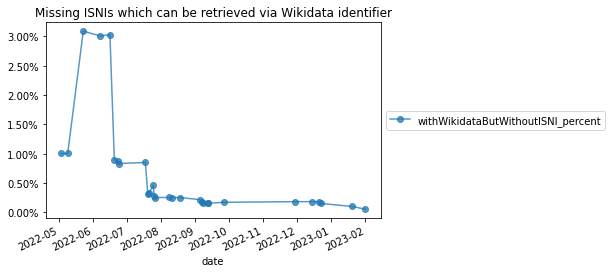

In [29]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withWikidataButWithoutISNI'],
                                  'Missing ISNIs which can be retrieved via Wikidata identifier',
                                 'numberContributors')

In [30]:
contributorStats[['numberContributors', 'withWikidataIdentifier', 'withISNIIdentifier', 'withWikidataButWithoutISNI']]

,numberContributors,withWikidataIdentifier,withISNIIdentifier,withWikidataButWithoutISNI
date,,,,
2022-05-03,48835,4292,44084,490
2022-05-23,15681,3879,11803,484
2022-06-16,15991,3881,11938,484
2022-05-09,48835,4292,44084,490
2022-06-07,16100,3881,12013,484
2022-06-20,5843,956,4486,52
2022-06-23,5901,959,4527,52
2022-06-24,6243,968,4742,52
2022-07-18,6352,996,4821,54


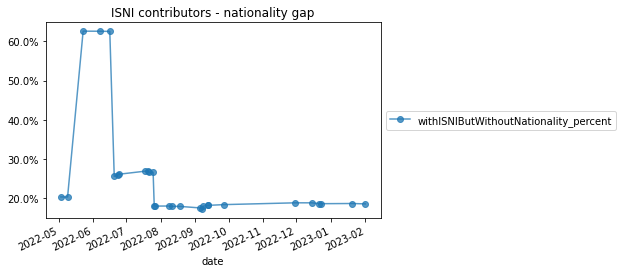

In [31]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withISNIButWithoutNationality'],
                                 'ISNI contributors - nationality gap',
                                 'withISNIIdentifier')

In [32]:
contributorStats[['numberContributors', 'withISNIIdentifier', 'withISNIButWithoutNationality']]

,numberContributors,withISNIIdentifier,withISNIButWithoutNationality
date,,,
2022-05-03,48835,44084,8950
2022-05-23,15681,11803,7387
2022-06-16,15991,11938,7464
2022-05-09,48835,44084,8950
2022-06-07,16100,12013,7516
2022-06-20,5843,4486,1146
2022-06-23,5901,4527,1169
2022-06-24,6243,4742,1237
2022-07-18,6352,4821,1296


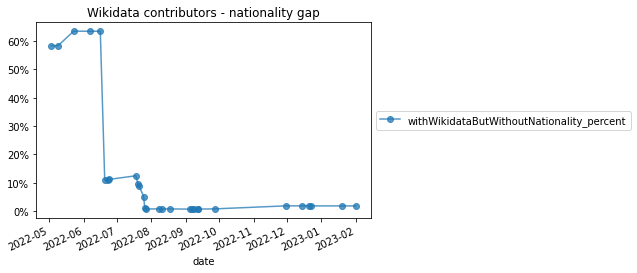

In [33]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withWikidataButWithoutNationality'],
                                 'Wikidata contributors - nationality gap',
                                 'withWikidataIdentifier')

In [34]:
contributorStats[['numberContributors', 'withWikidataIdentifier', 'withWikidataButWithoutNationality']]

,numberContributors,withWikidataIdentifier,withWikidataButWithoutNationality
date,,,
2022-05-03,48835,4292,2502
2022-05-23,15681,3879,2460
2022-06-16,15991,3881,2460
2022-05-09,48835,4292,2502
2022-06-07,16100,3881,2460
2022-06-20,5843,956,104
2022-06-23,5901,959,106
2022-06-24,6243,968,108
2022-07-18,6352,996,124


### Birth and death dates completeness

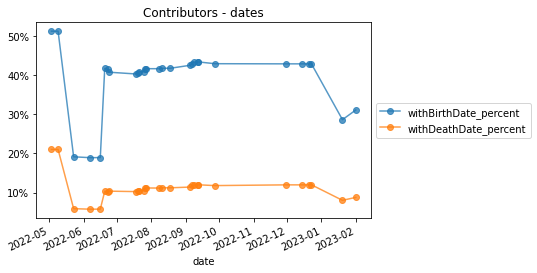

In [35]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withBirthDate', 'withDeathDate'],
                                  'Contributors - dates',
                                 'numberContributors')

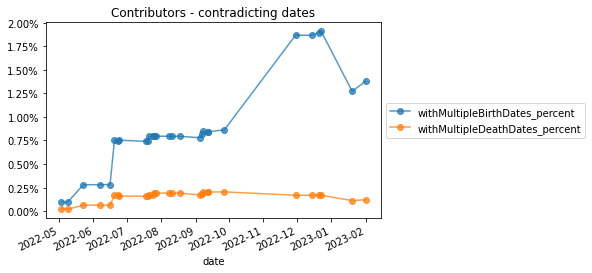

In [36]:
utils_plot.plotPercentageTimeline(contributorStats, 
                                  ['withMultipleBirthDates', 'withMultipleDeathDates'],
                                  'Contributors - contradicting dates',
                                 'numberContributors')

In [37]:
contributorStats[['numberContributors', 'withMultipleBirthDates', 'withMultipleDeathDates']]

,numberContributors,withMultipleBirthDates,withMultipleDeathDates
date,,,
2022-05-03,48835,47,10
2022-05-23,15681,44,10
2022-06-16,15991,45,10
2022-05-09,48835,47,10
2022-06-07,16100,45,10
2022-06-20,5843,44,10
2022-06-23,5901,44,10
2022-06-24,6243,47,10
2022-07-18,6352,47,10


In [38]:
contributorStats

,measurementTime,numberContributors,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withUnescoIdentifier,withKBRBnFKBAndUnescoIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,...,withNationality_percent,withMultipleNationalities_percent,withISNIButWithoutNationality_percent,withWikidataButWithoutNationality_percent,withISNIAndWikidataButWithoutNationality_percent,withWikidataButWithoutISNI_percent,withBirthDate_percent,withDeathDate_percent,withMultipleBirthDates_percent,withMultipleDeathDates_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2023-02-02 22:36:15.796164,48835,12850,3357,6499,0,0,338,1127,2094,...,73.455513,0.274393,20.302150,58.294501,4.150712,1.003379,51.286987,21.015665,0.096242,0.020477
2022-05-23,2023-02-02 22:36:18.149055,15681,10923,1764,6499,0,0,338,1071,2094,...,31.637013,0.758880,62.585783,63.418407,12.671386,3.086538,19.137810,5.866973,0.280594,0.063771
2022-06-16,2023-02-02 22:36:18.916944,15991,11233,1779,6499,0,0,338,1086,2094,...,31.473954,0.750422,62.523036,63.385725,12.425739,3.026703,18.935651,5.746983,0.281408,0.062535
2022-05-09,2023-02-02 22:36:17.114953,48835,12850,3357,6499,0,0,338,1127,2094,...,73.455513,0.274393,20.302150,58.294501,4.150712,1.003379,51.286987,21.015665,0.096242,0.020477
2022-06-07,2023-02-02 22:36:18.554562,16100,11342,1780,6499,0,0,338,1087,2094,...,31.434783,0.745342,62.565554,63.385725,12.341615,3.006211,18.913043,5.732919,0.279503,0.062112
2022-06-20,2023-02-02 22:36:19.253377,5843,5214,1231,1063,0,0,232,853,774,...,64.333390,1.797022,25.546144,10.878661,1.009755,0.889954,41.776485,10.320041,0.753038,0.171145
2022-06-23,2023-02-02 22:36:19.412508,5901,5272,1232,1067,0,0,233,854,778,...,64.056940,1.779359,25.822841,11.053180,1.033723,0.881207,41.501440,10.235553,0.745636,0.169463
2022-06-24,2023-02-02 22:36:19.549339,6243,5621,1237,1079,0,0,235,864,792,...,63.607240,1.697902,26.086040,11.157025,1.009130,0.832933,40.781675,10.347589,0.752843,0.160179
2022-07-18,2023-02-02 22:36:19.693739,6352,5711,1241,1134,0,0,239,868,828,...,62.909320,1.684509,26.882390,12.449799,1.212217,0.850126,40.333753,10.232997,0.739924,0.157431
